In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [157]:
df = pd.read_csv('/Volumes/thesis-data/CT_PHD_2013_15.csv', dtype={'INTERNAL_ID' : str, 'SPECIALTY' : str}, engine='python')
#df_1517 = pd.read_csv('/Volumes/thesis-data/CT_PHD_2015_17.csv', dtype={'INTERNAL_ID' : str, 'SPECIALTY' : str}, engine='python')

#df = pd.concat([df_1315, df_1517])

In [158]:
df.describe()

,Age,LOS,TH_TIME,ACTIVITY,MFF,COST,NetCost,DIRECT,INDIRECT,OVERHEAD,...,RDSec,MetCancPrim,MetCancSec,SLDPrim,SLDSec,HIVPrim.1,HIVSec.1,C.DIFF,MRSA,Obese
count,189716.000000,189716.000000,189716.000000,189716.0,189716.0,189716.000000,189716.000000,0.0,0.0,0.0,...,189716.000000,189716.000000,189716.000000,189716.000000,189716.000000,189716.000000,189716.000000,189716.000000,189716.000000,189716.000000
mean,52.190643,3.056832,12.862742,1.0,1.0,1556.603604,1434.277203,NaN,NaN,NaN,...,0.405817,0.050475,0.260421,0.005977,0.058445,0.000169,0.000401,0.001729,0.001323,0.009620
std,26.914879,6.340646,36.198338,0.0,0.0,3412.467737,2519.947966,NaN,NaN,NaN,...,1.973196,0.839114,1.891584,0.327959,1.024014,0.018366,0.028303,0.041544,0.036350,0.097607
min,0.000000,1.000000,0.000000,1.0,1.0,36.090000,36.090000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,0.000000,1.0,1.0,395.580000,389.350000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,1.000000,0.000000,1.0,1.0,710.620000,699.870000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,3.000000,0.000000,1.0,1.0,1578.922500,1530.360000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,107.000000,367.000000,1224.000000,1.0,1.0,290320.880000,175352.920000,NaN,NaN,NaN,...,10.000000,14.000000,14.000000,18.000000,18.000000,2.000000,2.000000,1.000000,1.000000,1.000000


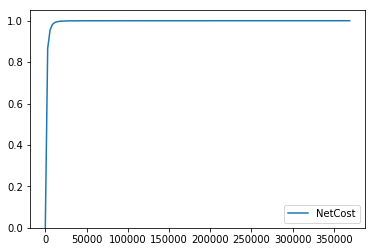

In [97]:
sns.kdeplot(data=df['NetCost'], cumulative=True);

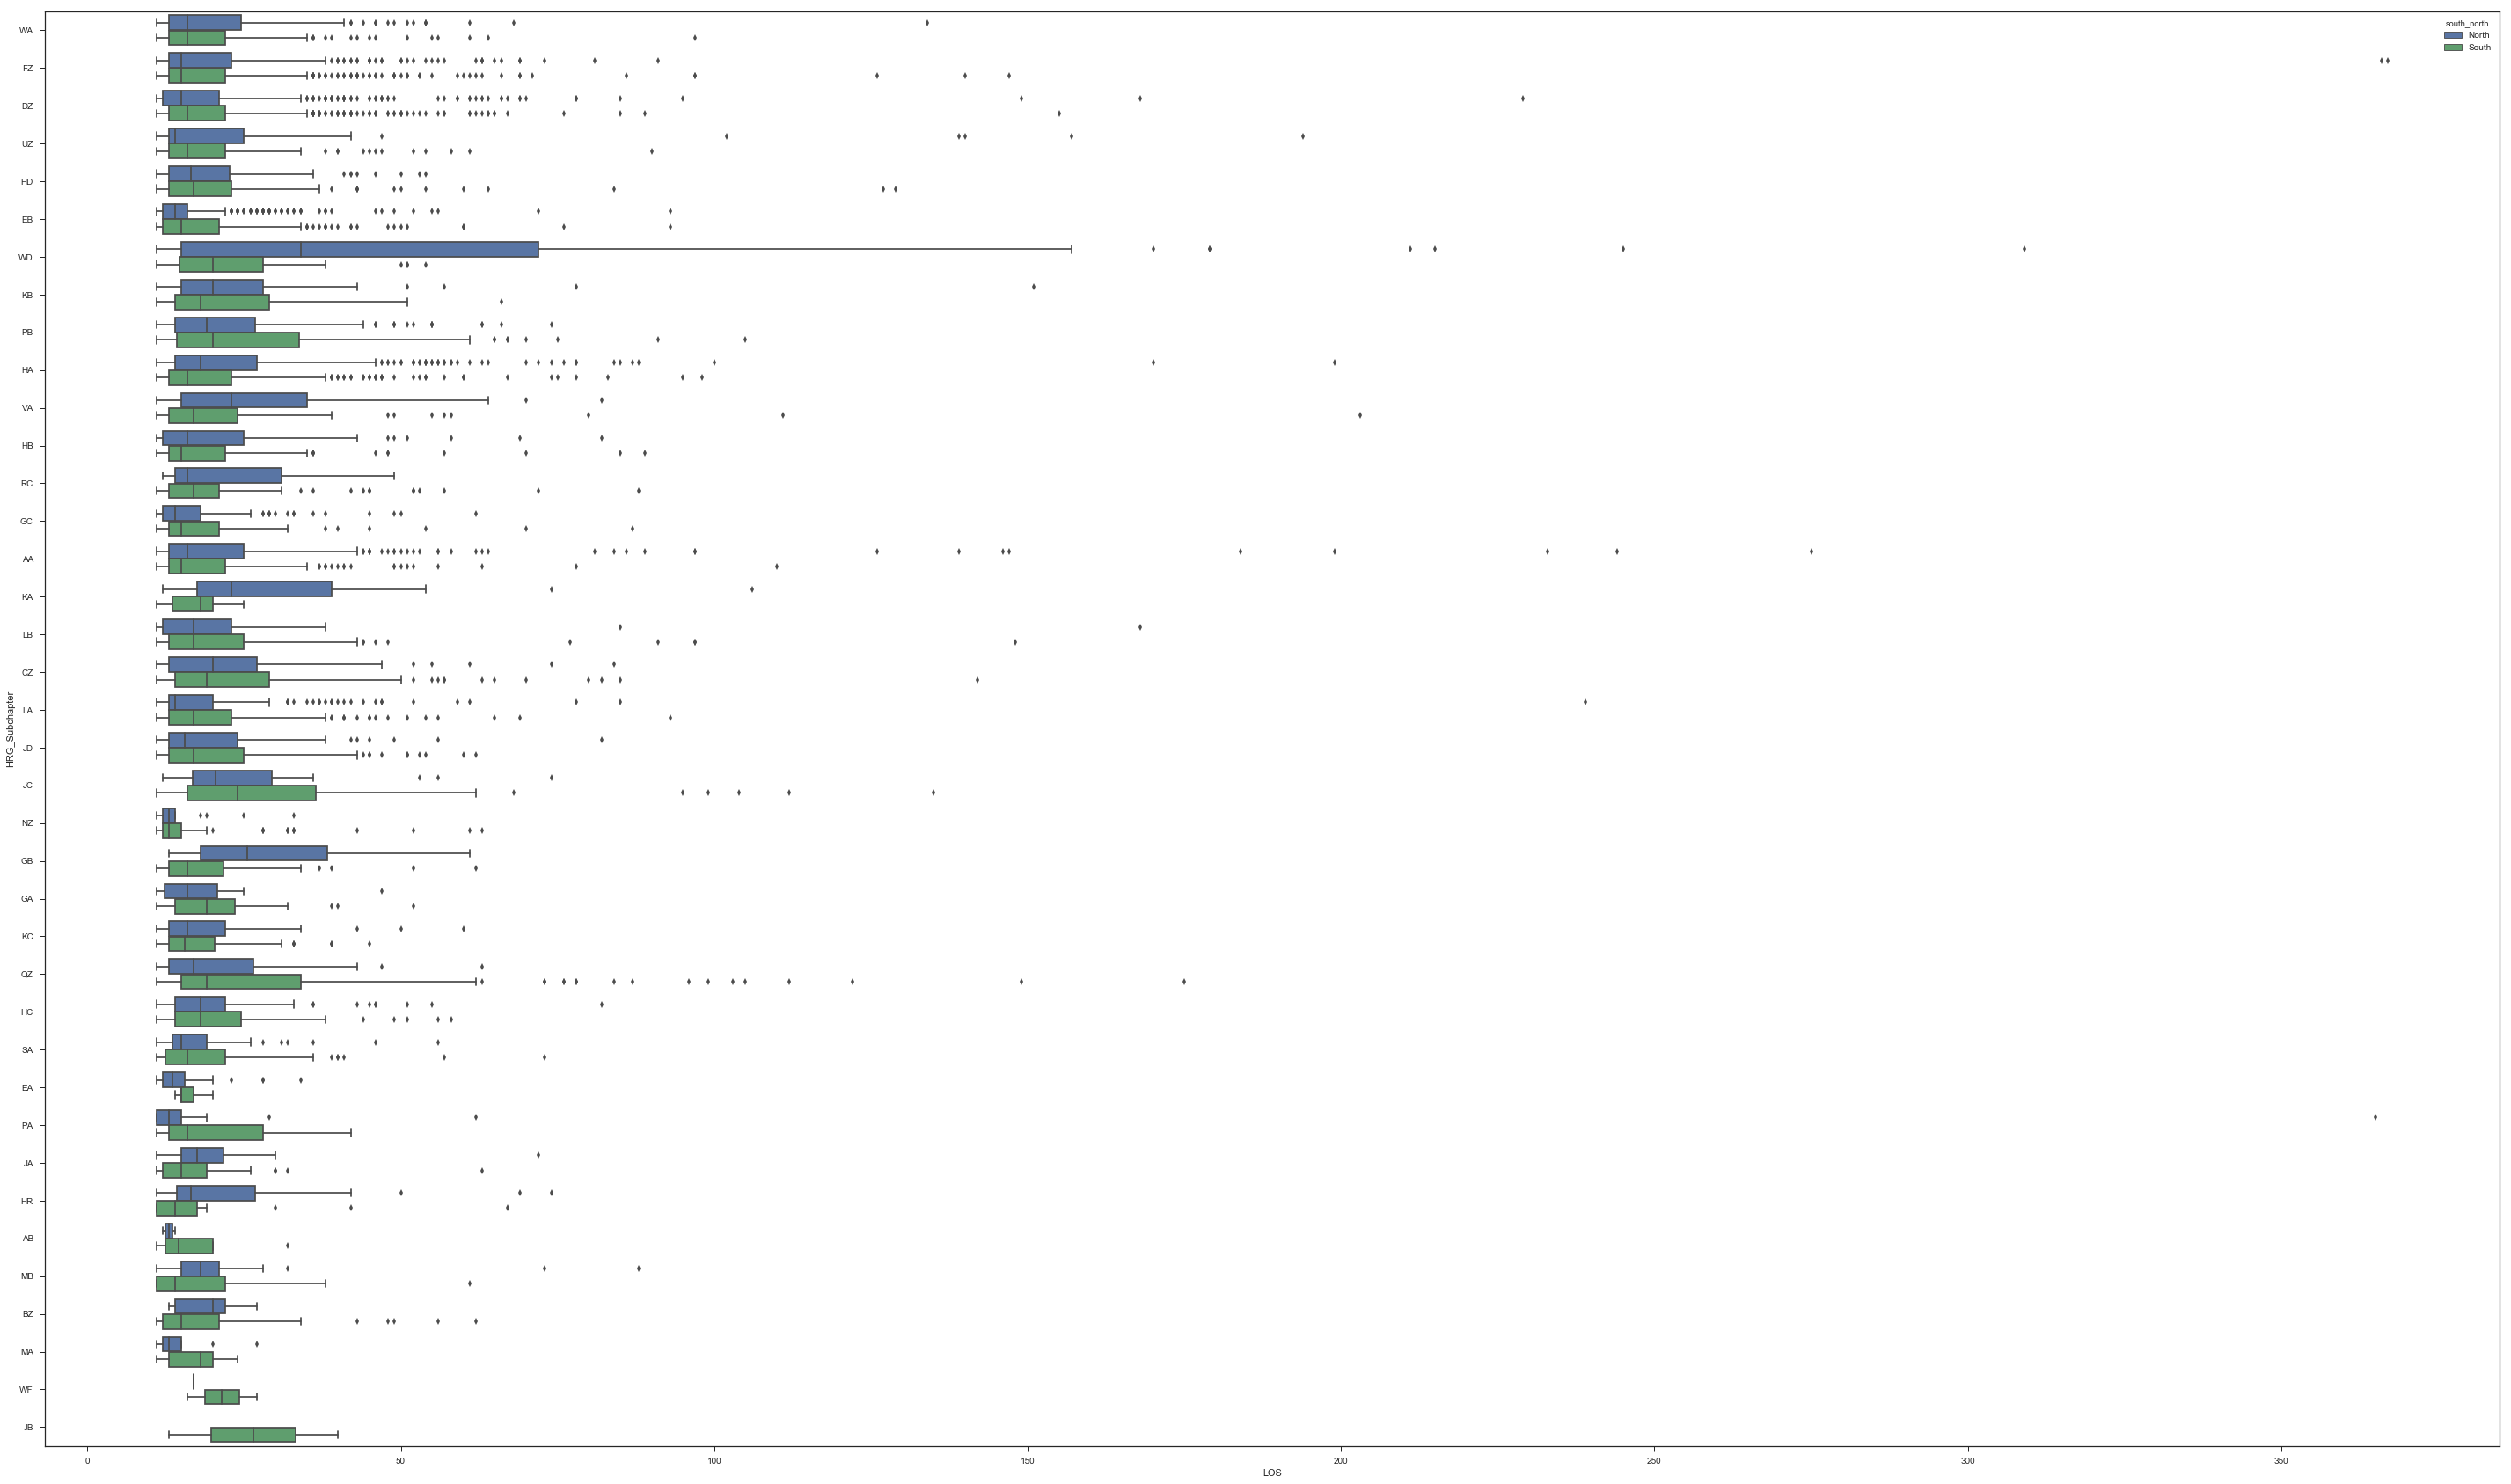

In [159]:
sns.set(style='ticks')

f, ax = plt.subplots(figsize=(50,30))

sns.boxplot(data=df[df['LOS'] > 10], x='LOS', y='HRG_Subchapter', hue='south_north');

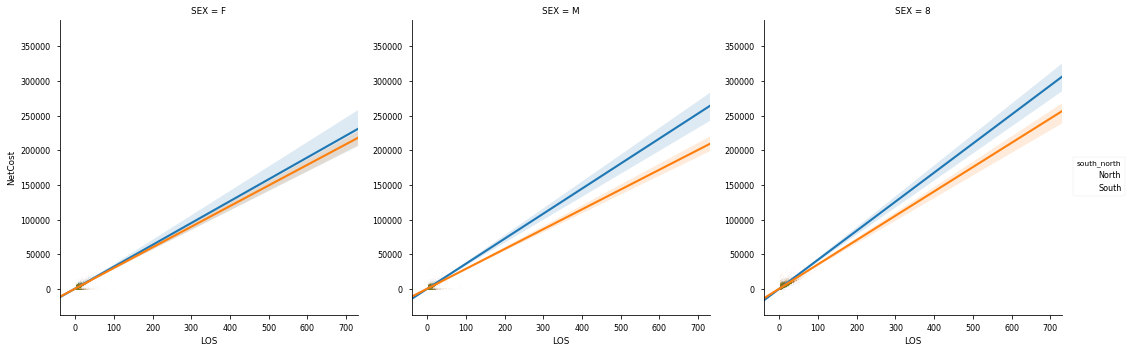

In [24]:
sns.lmplot(data=df, x='LOS', y='NetCost',
           hue='south_north', col='SEX', scatter_kws={'s': 0.01});

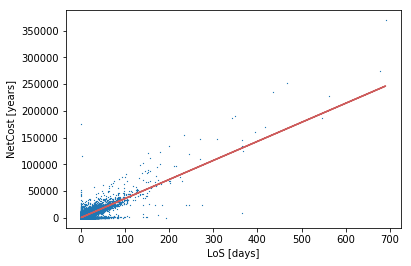

In [91]:
x = df['LOS']
y = df['NetCost']

fit = np.polyfit(x, y, 1)
fit_fn = np.poly1d(fit)

plt.scatter(x, y, marker='x', s=.1)
plt.plot(x, fit_fn(x), color='indianred')
plt.xlabel('LoS [days]')
plt.ylabel('NetCost [years]')
plt.savefig('LOS_NC.pdf', bbox_inches='tight');

In [116]:
df[(df['Bench_Period'] == '2015-16') | (df['Bench_Period'] == '2016-17')]['SEX'].unique()

array([8], dtype=object)

There seems to be a significant difference in NetCost for men being from either the North or South of Cwm Taf but not for women.

In [16]:
male_data = df[df['SEX'] == 'M']
south_male_data = male_data[male_data['south_north'] == 'South']
north_male_data = male_data[male_data['south_north'] == 'North']

In [17]:
stats.ttest_ind(south_male_data['NetCost'], north_male_data['NetCost'])

Ttest_indResult(statistic=-9.2169237383715839, pvalue=3.1242813857772193e-20)

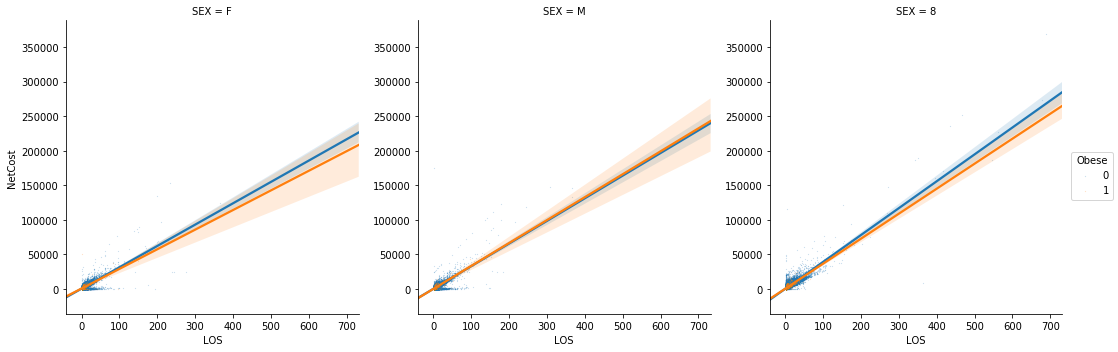

In [5]:
sns.lmplot(data=df, x='LOS', y='NetCost',
           hue='Obese', col='SEX', scatter_kws={'s': 0.01});

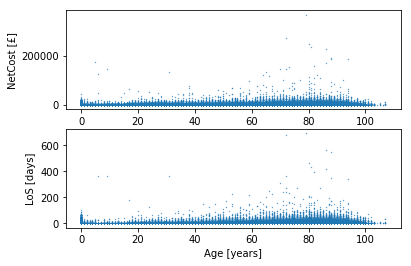

In [74]:
x1 = df['Age']
x2 = df['Age']

y1 = df['NetCost']
y2 = df['LOS']

plt.subplot(2, 1, 1)
plt.scatter(x1, y1, s=.1)
plt.xlabel('Age [years]')
plt.ylabel('NetCost [£]');

plt.subplot(2, 1, 2)
plt.scatter(x2, y2, s=.1)
plt.xlabel('Age [years]')
plt.ylabel('LoS [days]');

In [78]:
pd.DataFrame(df.corr())

,Age,LOS,TH_TIME,ACTIVITY,MFF,COST,NetCost,DIRECT,INDIRECT,OVERHEAD,...,RDSec,MetCancPrim,MetCancSec,SLDPrim,SLDSec,HIVPrim.1,HIVSec.1,C.DIFF,MRSA,Obese
Age,1.000000,0.176365,0.012264,NaN,NaN,0.073124,0.105481,NaN,NaN,NaN,...,0.191616,0.034446,0.084940,0.006325,0.008510,0.000928,-0.003157,0.029660,0.012943,0.014846
LOS,0.176365,1.000000,0.096065,NaN,NaN,0.766768,0.846653,NaN,NaN,NaN,...,0.078782,0.022666,0.047322,0.005660,0.011424,0.006557,-0.000291,0.043731,0.043124,0.020428
TH_TIME,0.012264,0.096065,1.000000,NaN,NaN,0.325760,0.379684,NaN,NaN,NaN,...,-0.033807,0.008719,0.007132,-0.006038,-0.016797,0.000242,-0.001616,-0.006845,0.001327,0.015914
ACTIVITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MFF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COST,0.073124,0.766768,0.325760,NaN,NaN,1.000000,0.859371,NaN,NaN,NaN,...,0.040164,0.012872,0.023989,0.008279,0.005684,0.012657,-0.001809,0.024652,0.026022,0.025230
NetCost,0.105481,0.846653,0.379684,NaN,NaN,0.859371,1.000000,NaN,NaN,NaN,...,0.041311,0.017871,0.033403,0.002998,-0.000177,0.005270,-0.002204,0.027099,0.026533,0.017801
DIRECT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INDIRECT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OVERHEAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df['OVH'].mean(), df['OVH'].std(), df['OVH'].var()

(354.0408609033852, 686.6959163360623, 471551.2815126243)